In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('CO2 emission.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
data.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [6]:
data_new = data[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
data_new.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [7]:
data.shape

(1067, 13)

In [8]:
data_new.shape

(1067, 4)

In [10]:
data_new.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.776788,0.849685
FUELCONSUMPTION_COMB,0.819482,0.776788,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.892129,1.000000


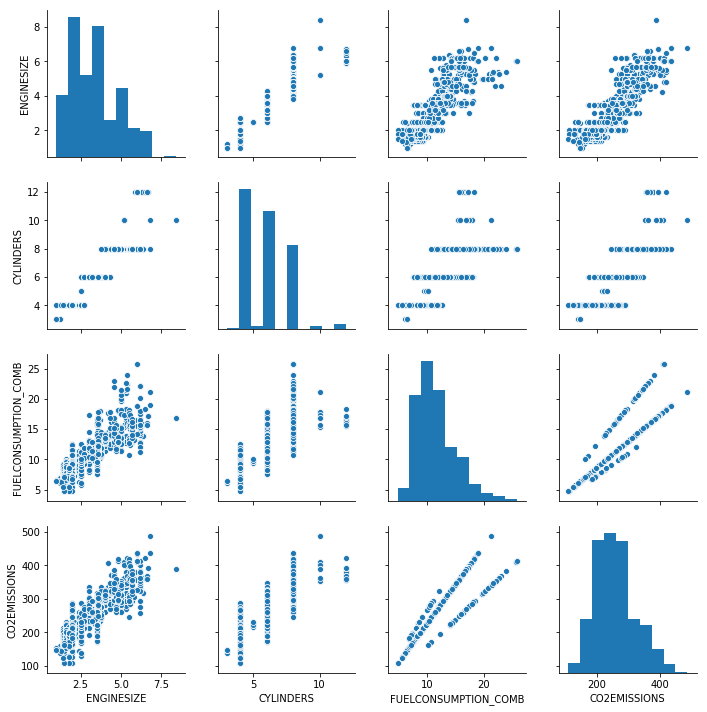

In [11]:
sns.pairplot(data_new)

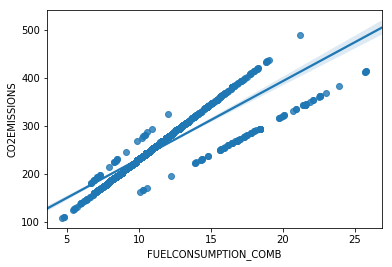

In [13]:
sns.regplot(data_new['FUELCONSUMPTION_COMB'], data_new['CO2EMISSIONS'])

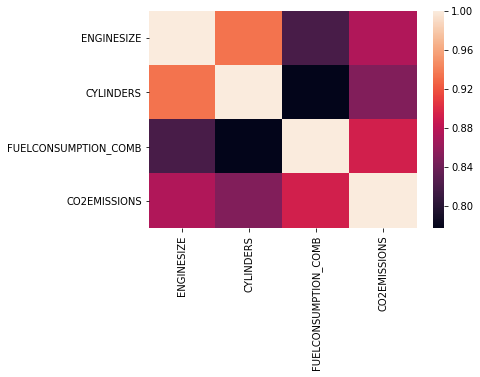

In [14]:
sns.heatmap(data_new.corr())

In [15]:
#Multi - collinearity (-0.7 < c < 0.7)

data_new.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.776788,0.849685
FUELCONSUMPTION_COMB,0.819482,0.776788,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.892129,1.000000


In [16]:
#Simple Linear Regression

from sklearn.model_selection import train_test_split

In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(data_new[['FUELCONSUMPTION_COMB']], 
                                                data_new[['CO2EMISSIONS']] , test_size = 0.25)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()

In [23]:
model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
model.score(xtrain, ytrain)

0.8014845836622242

In [25]:
model.coef_

array([[16.44646032]])

In [26]:
model.intercept_

array([66.35124266])

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
y_predicted = model.predict(xtest)

In [29]:
mean_absolute_error(ytest, y_predicted)

20.460824423916836

In [30]:
mean_squared_error(ytest, y_predicted)

864.2511387070775

In [39]:
#Multiple Linear Regression

from sklearn.model_selection import train_test_split

In [40]:
xtrain, xtest, ytrain, ytest = train_test_split(data_new[['ENGINESIZE','FUELCONSUMPTION_COMB']],
                                                data_new[['CO2EMISSIONS']] ,test_size = 0.2)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
model_new = LinearRegression()

In [43]:
model_new.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
model_new.score(xtrain, ytrain)

0.8622146212983569

In [47]:
model_new.coef_

array([[18.54158999, 10.27202478]])

In [48]:
model_new.intercept_

array([75.77124331])

In [49]:
y_predicted = model_new.predict(xtest)

In [50]:
mean_absolute_error(y_predicted, ytest)

18.389669562098923

In [51]:
mean_squared_error(y_predicted, ytest)

622.889494262529